In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lineartree import *
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing, make_classification

import warnings
warnings.simplefilter('ignore')

# Linear Tree Regressor at work

In [2]:
def gen_sinusoidal(timesteps, amp, freq, noise, random_state=None):
    
    if random_state is not None:
        np.random.seed(random_state)
    
    X = np.arange(timesteps)
    e = np.random.normal(0,noise, (timesteps,))
    y = amp*np.sin(X*(2*np.pi/freq))+e
    
    return y

In [3]:
## generate sinusoidal data

y1 = gen_sinusoidal(timesteps=4000, amp=10, freq=240, noise=3, random_state=33)
y2 = gen_sinusoidal(timesteps=4000, amp=10, freq=240*7, noise=3, random_state=33)

y = y1+y2
X = np.arange(y.shape[0]).reshape(-1,1)

Text(0, 0.5, 'target')

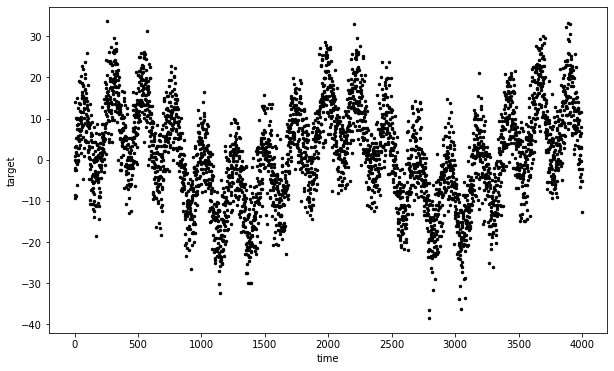

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=6, c='black')
plt.xlabel('time'); plt.ylabel('target')

In [5]:
## fit a linear tree regressor

lt = LinearTreeRegressor(
    base_estimator = LinearRegression(),
    min_samples_leaf = 200,
    max_depth = 6,
    max_bins = 20
).fit(X, y)

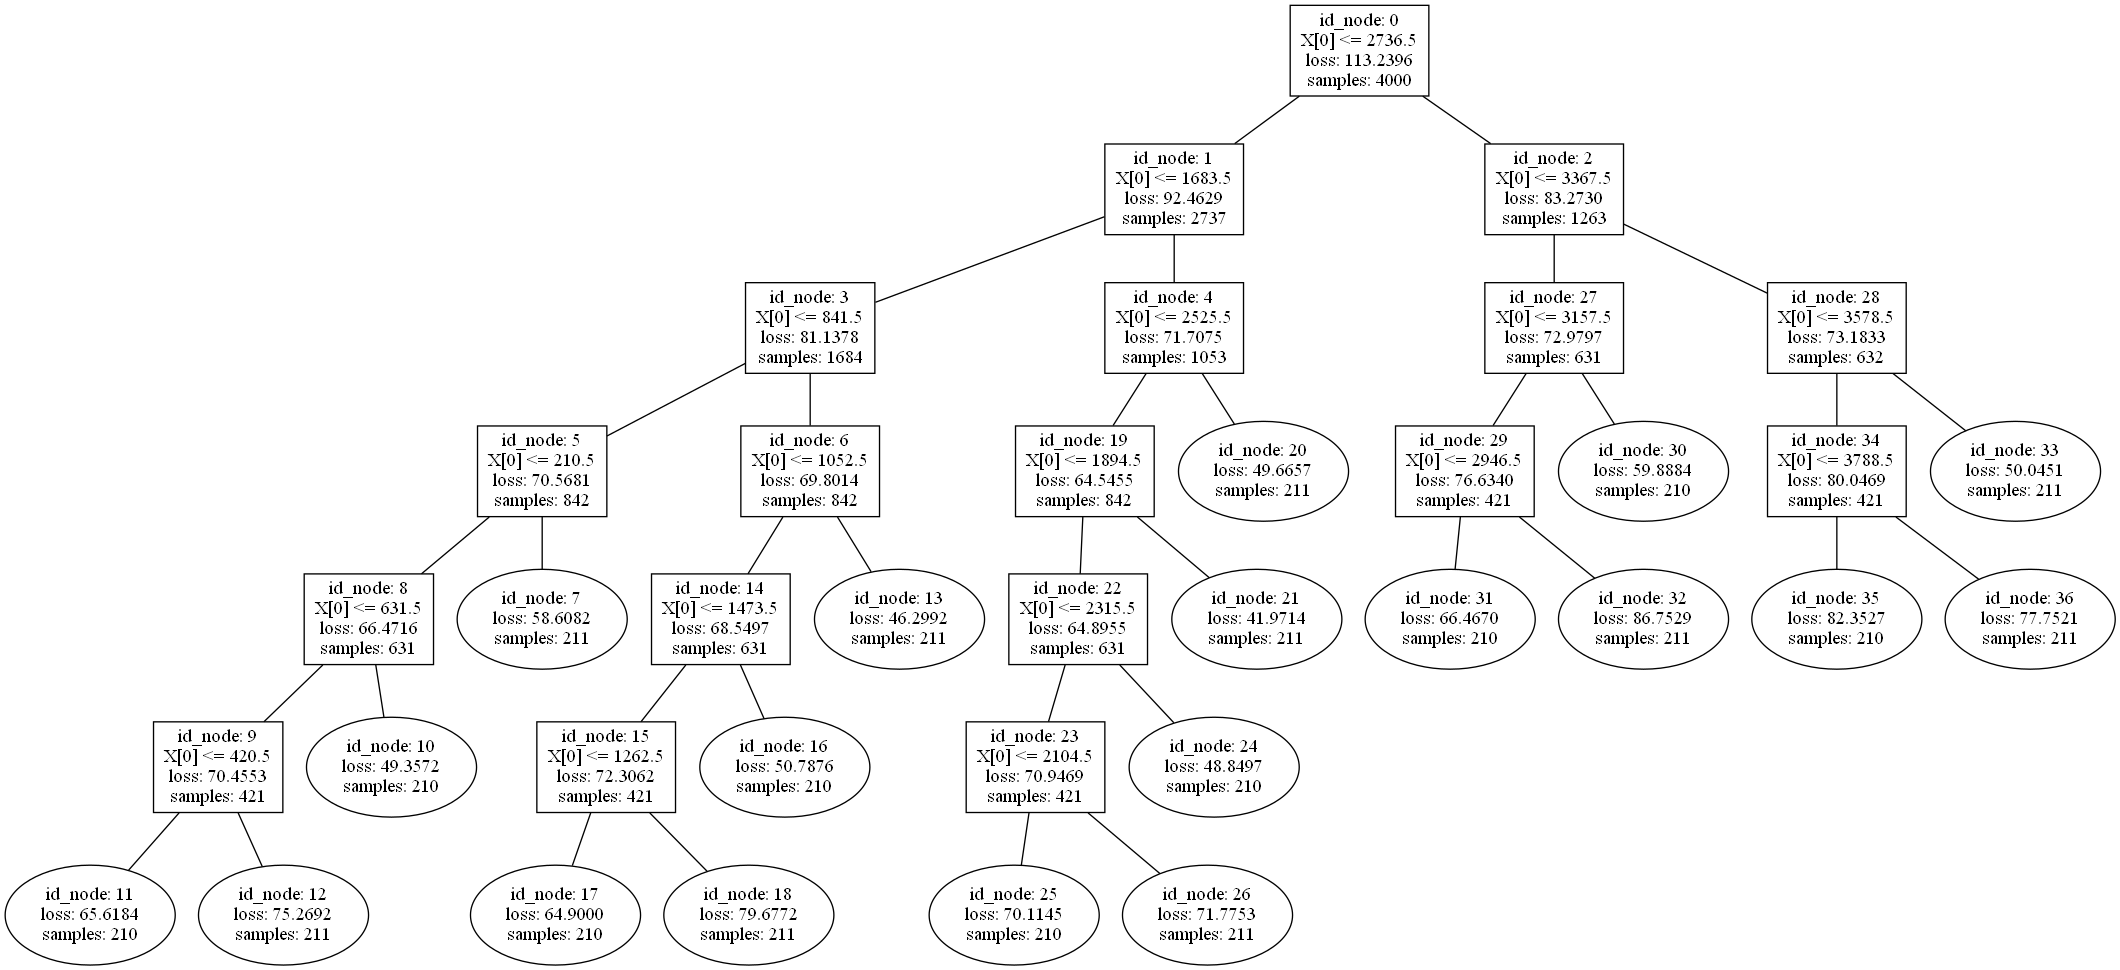

In [6]:
## plot full fitted model tree

lt.plot_model()

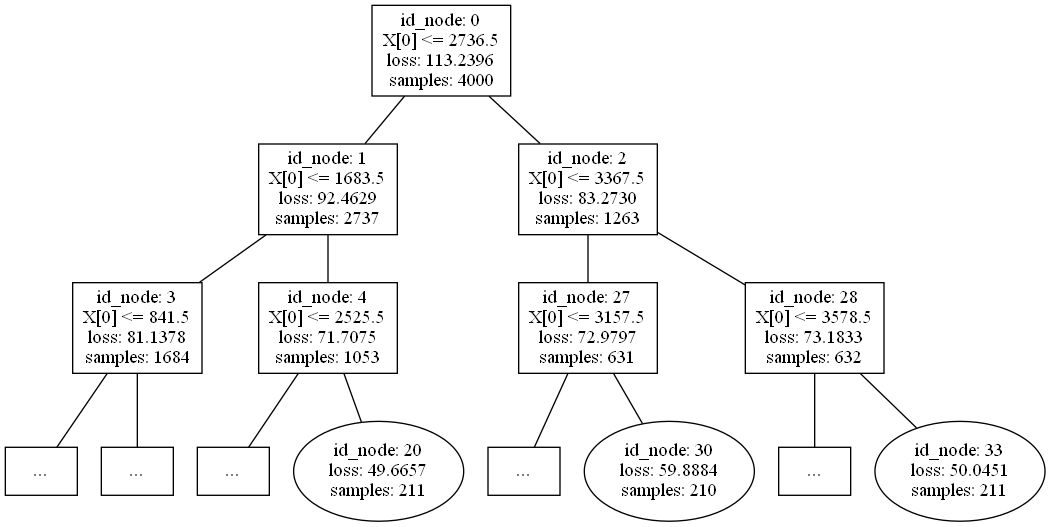

In [7]:
## plot fitted model tree with fixed max depth

lt.plot_model(max_depth=3)

Text(0, 0.5, 'target')

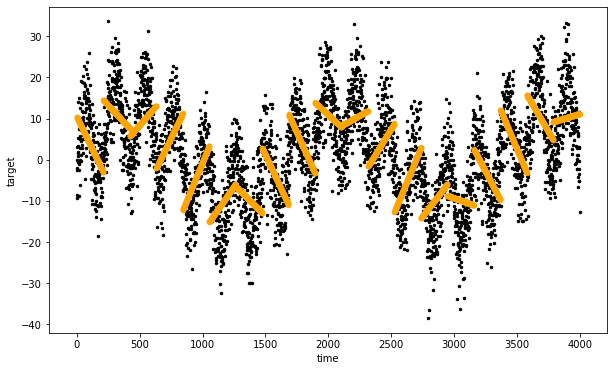

In [8]:
## plot linear tree regressor predictions

plt.figure(figsize=(10,6))
plt.scatter(X, y, s=6, c='black')
plt.scatter(X, lt.predict(X), s=20, c='orange')
plt.xlabel('time'); plt.ylabel('target')

In [9]:
## fit linear tree regressor fit quadratic features

pipe = make_pipeline(PolynomialFeatures(degree=2), 
                     LinearTreeRegressor(LinearRegression(), max_bins = 20,
                                         max_depth = 10, min_samples_leaf = 200))
pipe.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lineartreeregressor',
                 LinearTreeRegressor(base_estimator=LinearRegression(),
                                     max_bins=20, max_depth=10,
                                     min_samples_leaf=200))])

Text(0, 0.5, 'target')

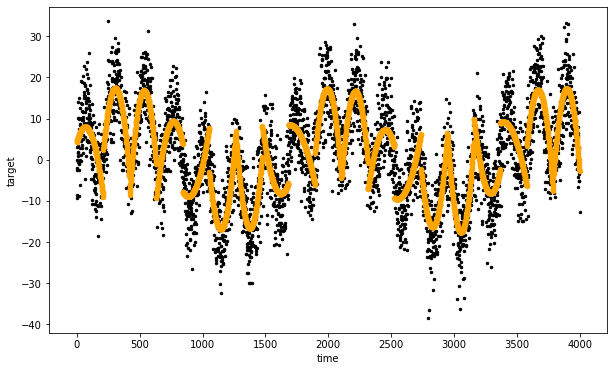

In [10]:
## plot linear tree regressor predictions with quadratic features

plt.figure(figsize=(10,6))
plt.scatter(X, y, s=6, c='black')
plt.scatter(X, pipe.predict(X), s=20, c='orange')
plt.xlabel('time'); plt.ylabel('target')

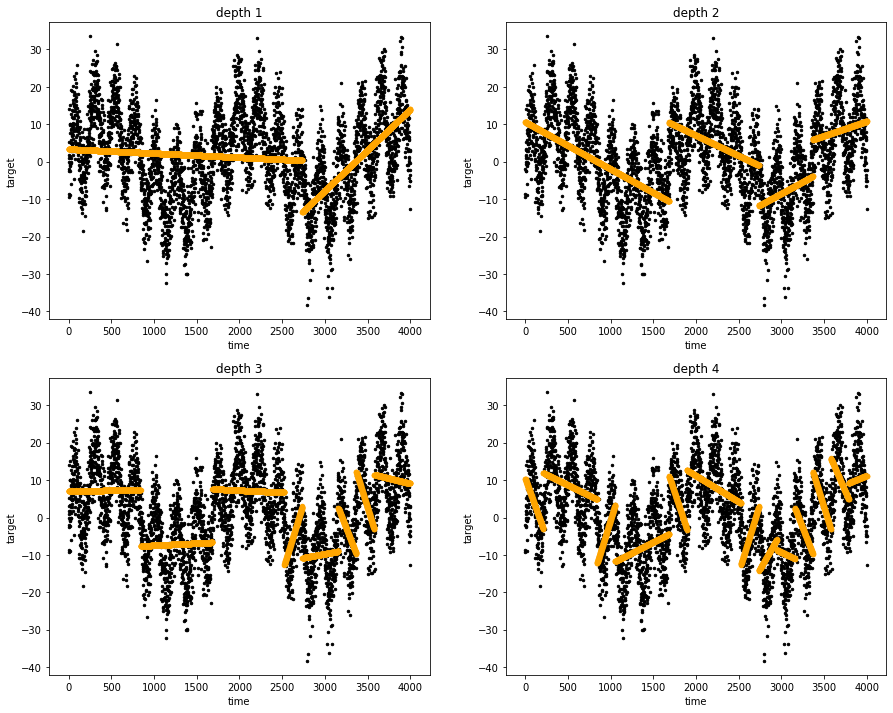

In [11]:
## plot linear tree regressor predictions at various depth

plt.figure(figsize=(15,12))

for depth in range(1,5):
    
    lt = LinearTreeRegressor(
        base_estimator = LinearRegression(),
        min_samples_leaf = 200,
        max_bins = 20,
        max_depth = depth
    ).fit(X, y)
    
    plt.subplot(2,2, depth)
    plt.scatter(X, y, s=6, c='black')
    plt.scatter(X, lt.predict(X), s=20, c='orange')
    plt.xlabel('time'); plt.ylabel('target')
    plt.title("depth {}".format(depth))

In [12]:
## fit a decision tree regressor

dr = DecisionTreeRegressor(
    max_depth = 6
).fit(X, y)

Text(0, 0.5, 'target')

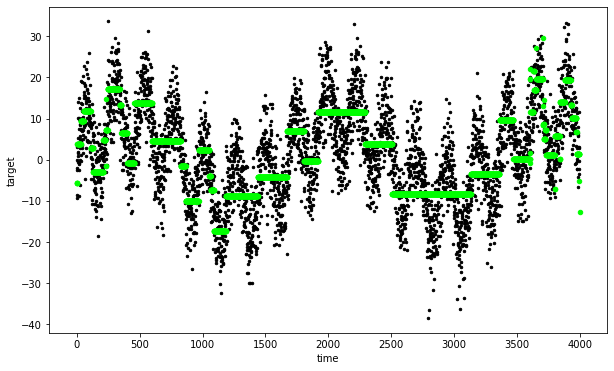

In [13]:
## plot decision tree regressor predictions

plt.figure(figsize=(10,6))
plt.scatter(X, y, s=6, c='black')
plt.scatter(X, dr.predict(X), s=20, c='lime')
plt.xlabel('time'); plt.ylabel('target')

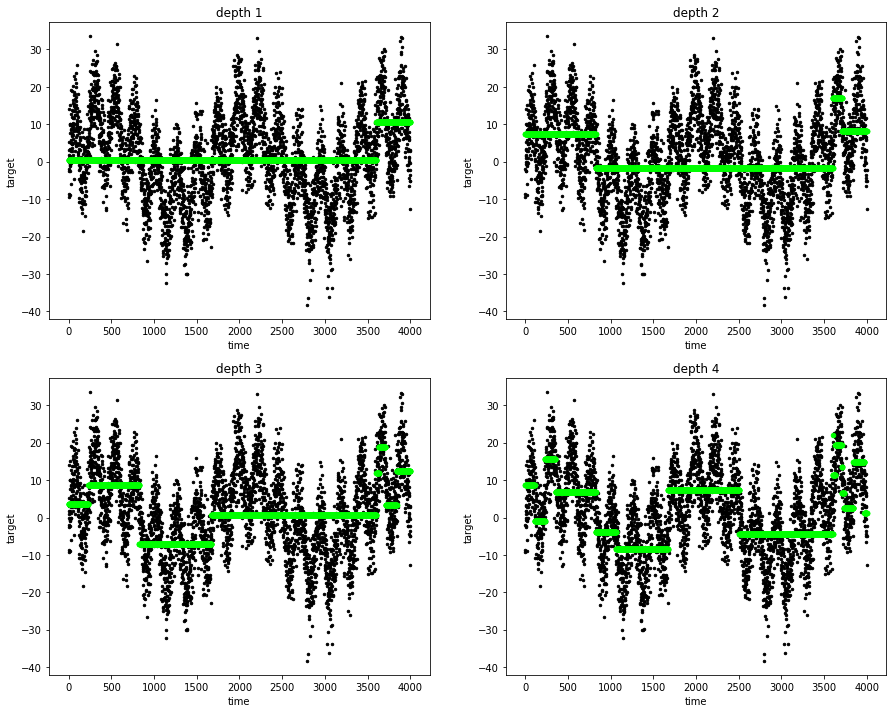

In [14]:
## plot decision tree regressor predictions at various depth

plt.figure(figsize=(15,12))

for depth in range(1,5):
    
    dr = DecisionTreeRegressor(
        max_depth = depth
    ).fit(X, y)
    
    plt.subplot(2,2, depth)
    plt.scatter(X, y, s=6, c='black')
    plt.scatter(X, dr.predict(X), s=20, c='lime')
    plt.xlabel('time'); plt.ylabel('target')
    plt.title("depth {}".format(depth))

# Linear Tree Classifier at work

In [15]:
## generate data for classification task

X, y = make_classification(n_samples=3000, n_features=2, n_classes=3, 
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1,
                           shuffle=True, random_state=33)

X.shape, y.shape

((3000, 2), (3000,))

Text(0, 0.5, 'features 1')

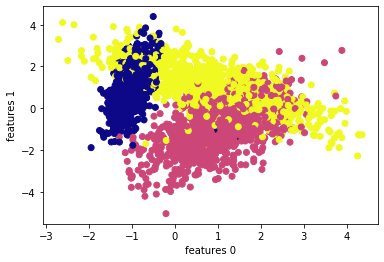

In [16]:
plt.scatter(X[:,0], X[:,1], cmap='plasma', c=y)
plt.xlabel('features 0'); plt.ylabel('features 1')

In [17]:
## fit a linear tree classifier

lt = LinearTreeClassifier(
    base_estimator = RidgeClassifier(),
    min_samples_leaf = 100,
    max_depth = 6
).fit(X, y)

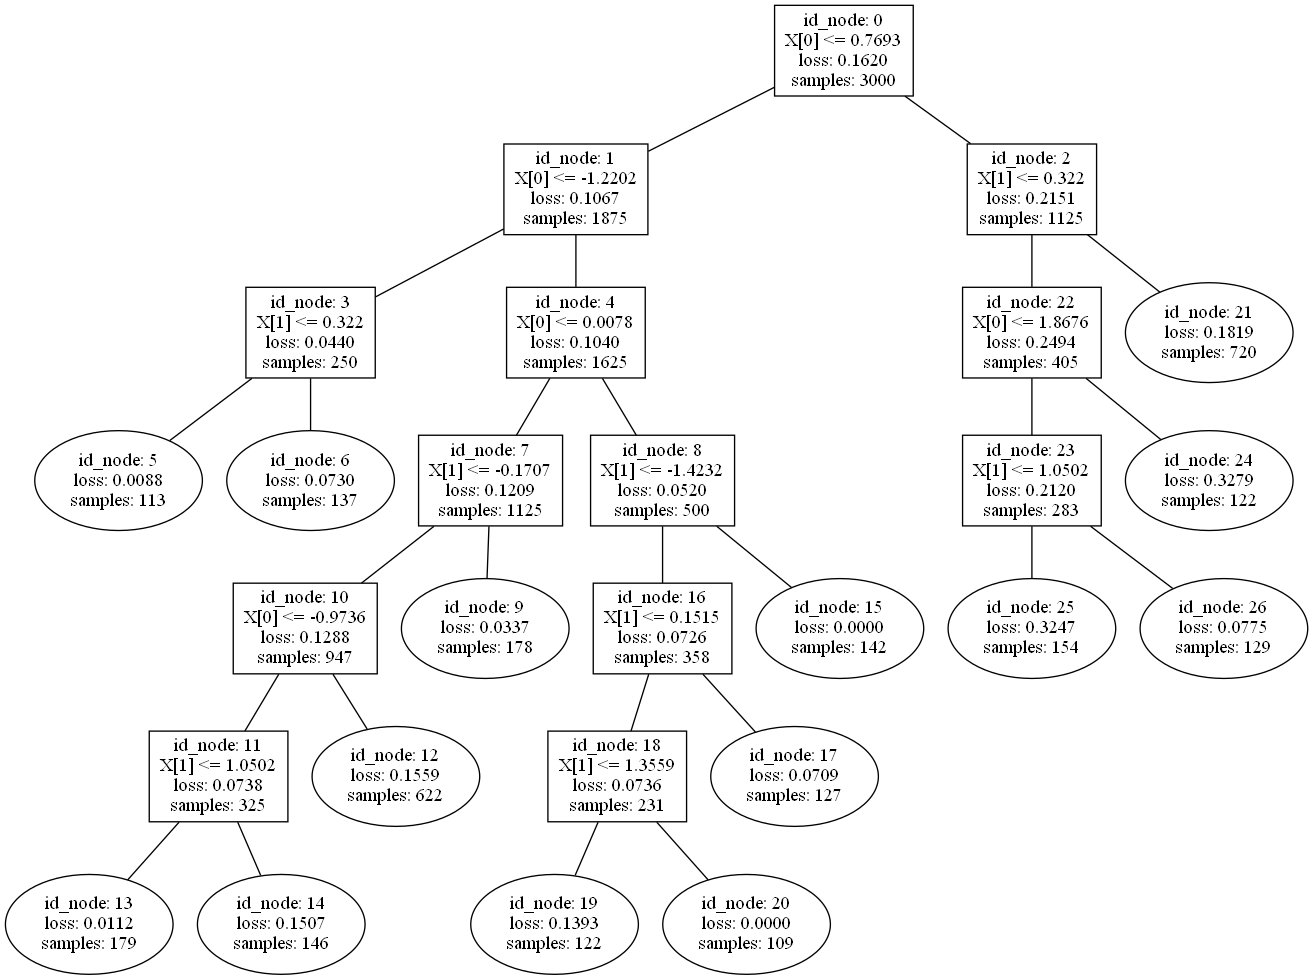

In [18]:
## plot full fitted model tree

lt.plot_model()

In [19]:
def plot_mesh(model, y, X, title):

    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel('features 0'); plt.ylabel('features 1')

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    plt.title(title)

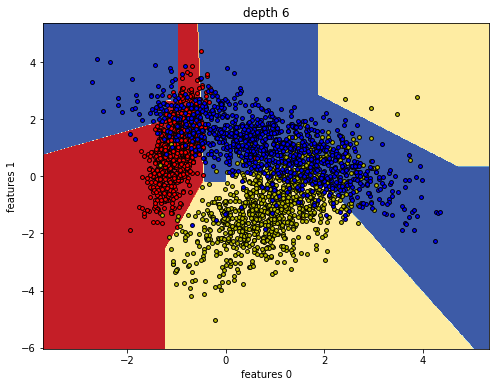

In [20]:
## plot decision surface of linear tree classifier

plt.figure(figsize=(8,6))

plot_mesh(lt, y, X, title="depth 6")

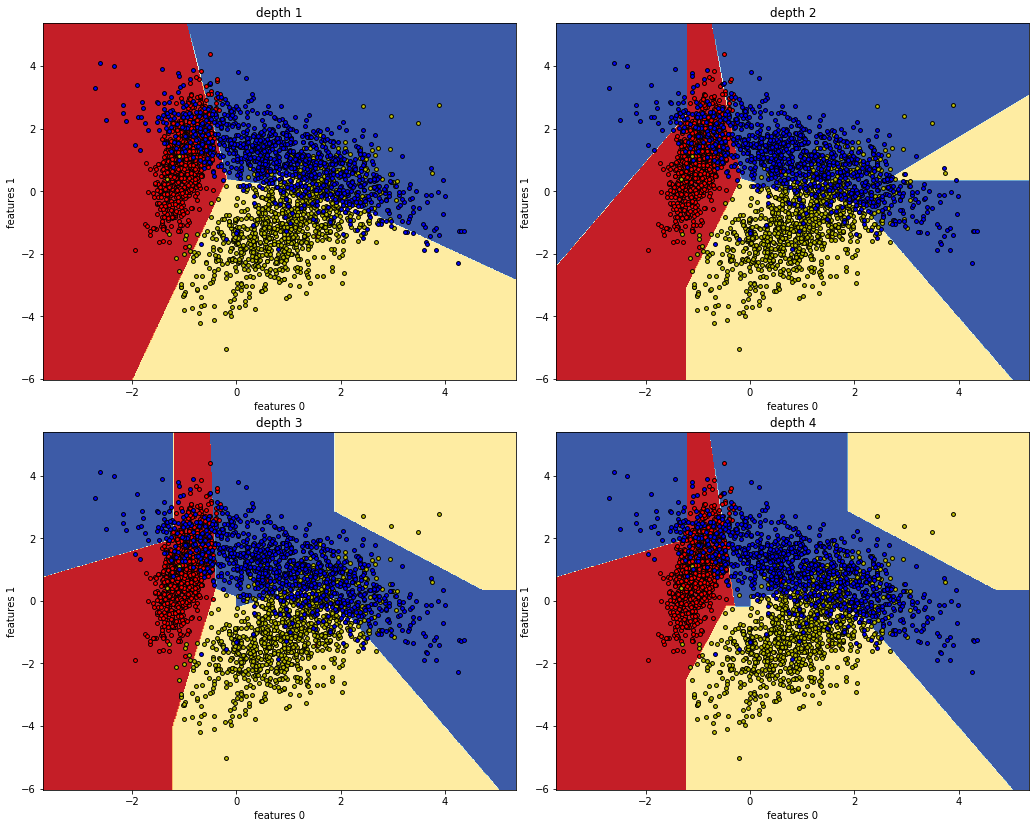

In [21]:
## plot decision surfaces of linear tree classifier at various depth

plt.figure(figsize=(15,12))

for depth in range(1,5):

    lt = LinearTreeClassifier(
        base_estimator = RidgeClassifier(),
        min_samples_leaf = 100,
        max_depth = depth
    ).fit(X, y)
    
    plt.subplot(2,2, depth)
    plot_mesh(lt, y, X, title="depth {}".format(depth))

In [22]:
## fit a decision tree classifier

dc = DecisionTreeClassifier(
    max_depth = 6
).fit(X, y)

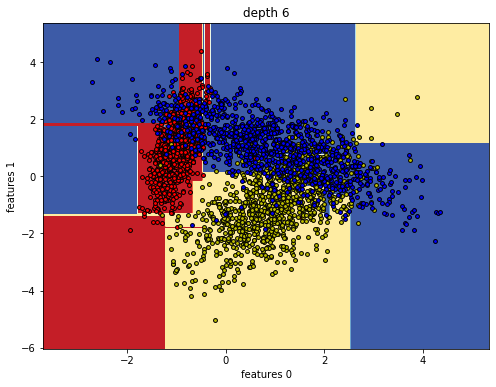

In [23]:
## plot decision surface of decision tree classifier

plt.figure(figsize=(8,6))

plot_mesh(dc, y, X, title="depth 6")

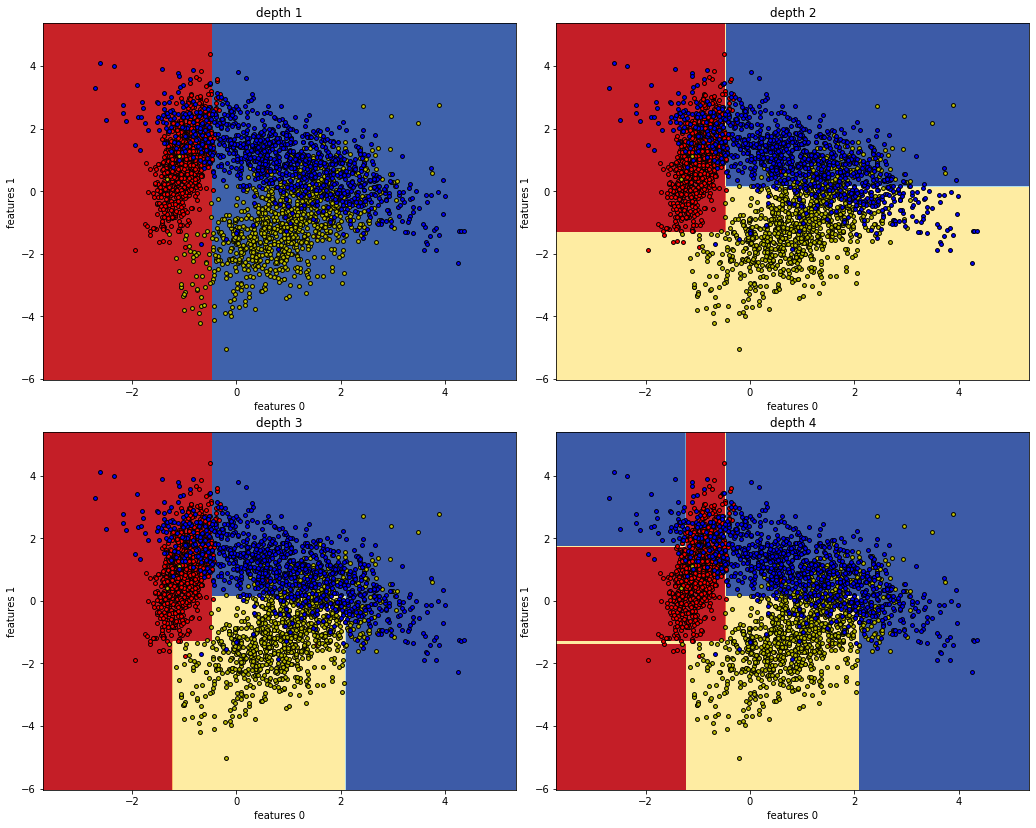

In [24]:
## plot decision surfaces of decision tree classifier at various depth

plt.figure(figsize=(15,12))

for depth in range(1,5):

    dc = DecisionTreeClassifier(
        max_depth = depth
    ).fit(X, y)

    plt.subplot(2,2, depth)
    plot_mesh(dc, y, X, title="depth {}".format(depth))

# Extract and examine coefficients at the leaves

In [25]:
## load data

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [26]:
## fit a linear tree regressor

lt = LinearTreeRegressor(
    base_estimator = Ridge(),
    max_depth = 10,
)
lt.fit(X, y)

LinearTreeRegressor(base_estimator=Ridge(), max_depth=10)

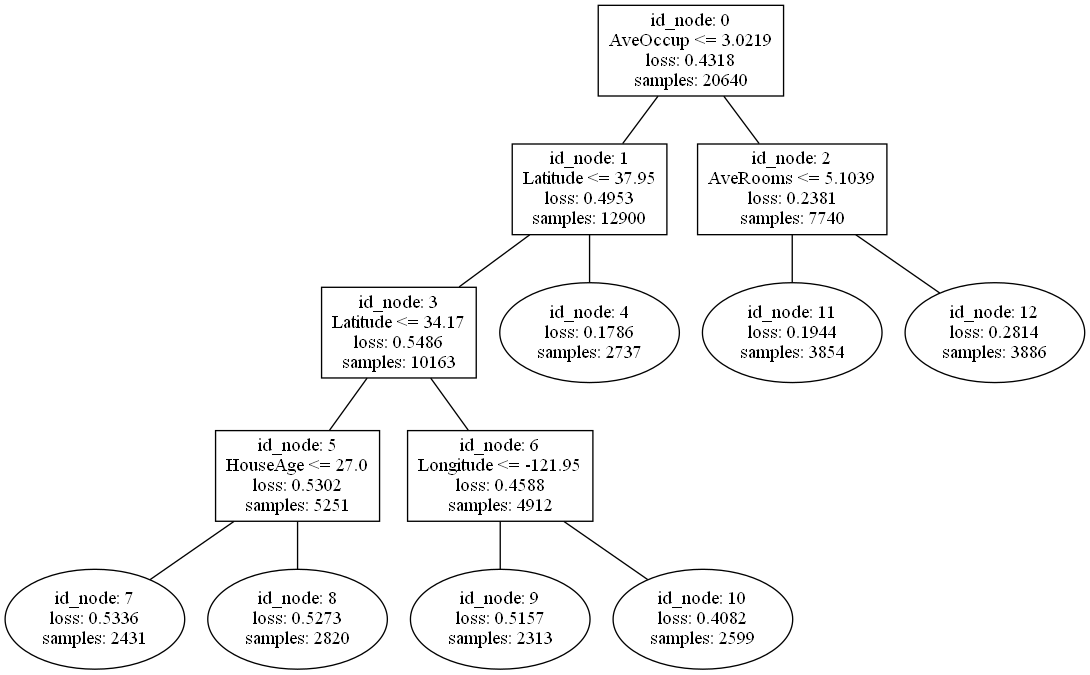

In [27]:
## plot full fitted model tree

lt.plot_model(feature_names=X.columns)

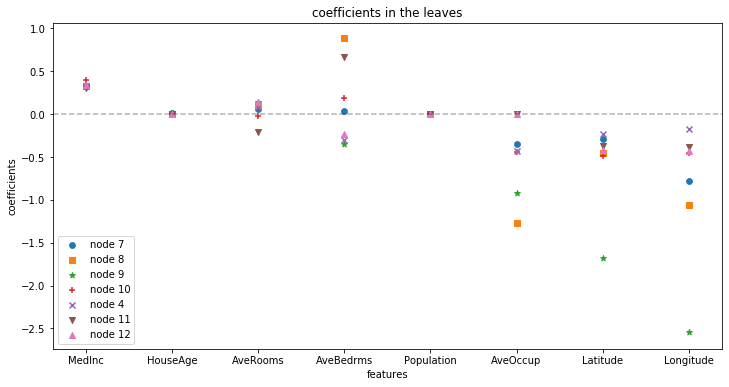

In [28]:
## Extract coefficients at the leaves

leaves = lt.summary(only_leaves=True)
markers = '8s*+xv^.'

plt.figure(figsize=(12,6))
for m,(i,l) in enumerate(leaves.items()):
    plt.scatter(range(X.shape[1]), l['models'].coef_, 
                marker=markers[m], label="node {}".format(i))

plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.title('coefficients in the leaves')
plt.xticks(range(X.shape[1]), X.columns)
plt.ylabel('coefficients'); plt.xlabel('features')
plt.legend()

# Impact of the features automatically generated with Linear Boosting

In [29]:
## fit a linear boost regressor

lb = LinearBoostRegressor(base_estimator=Ridge(alpha=3), loss='linear', n_estimators=30)
lb.fit(X, y)

LinearBoostRegressor(base_estimator=Ridge(alpha=3), n_estimators=30)

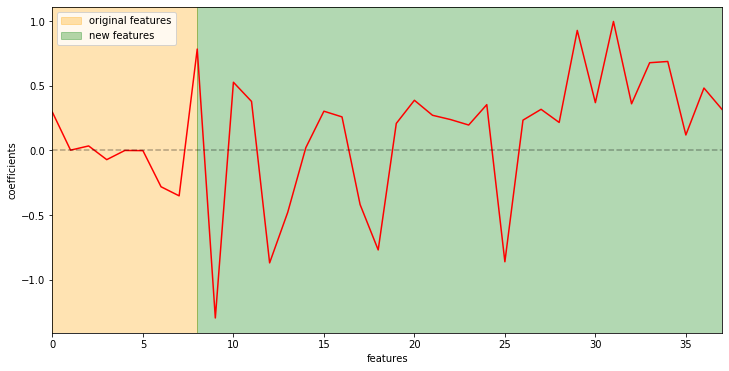

In [30]:
## show feature importances (coefficients)

plt.figure(figsize=(12,6))
plt.plot(lb.coef_, color='red')
plt.xlim(0, lb.coef_.shape[-1]-1)
plt.ylabel('coefficients'); plt.xlabel('features')
plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.axvspan(0, X.shape[-1], alpha=0.3, color='orange', label='original features')
plt.axvspan(X.shape[-1], lb.coef_.shape[-1]-1, alpha=0.3, color='green', label='new features')
plt.legend()

# Comparing predictions of Linear Forest and Random Forest

In [31]:
## generate data with shift

np.random.seed(33)

f = lambda x: np.log(1 + np.exp(3 * x)) + np.random.normal(0, 1, x.shape)
x = np.arange(-1, 3, 0.005)
y = f(x)

In [32]:
## fit a linear forest regressor

test_size = 200

rf = RandomForestRegressor(random_state=33, max_depth=3)
rf.fit(x[:-test_size].reshape(-1,1), y[:-test_size])

y_pred_rf = rf.predict(x.reshape(-1,1))

lf = LinearForestRegressor(LinearRegression(), random_state=33, max_depth=3)
lf.fit(x[:-test_size].reshape(-1,1), y[:-test_size])

y_pred_lf = lf.predict(x.reshape(-1,1))

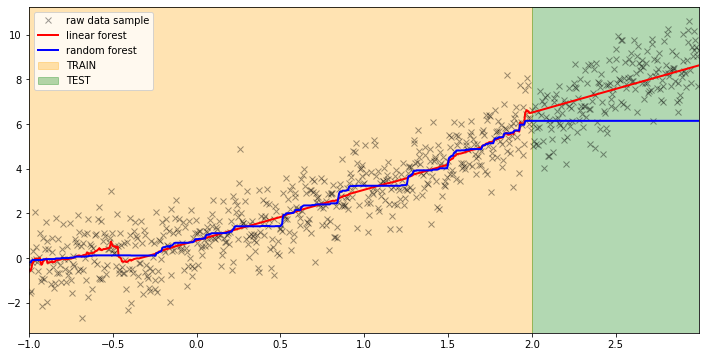

In [33]:
## plot predictions

plt.figure(figsize=(12, 6))
plt.plot(x, y, "kx", label="raw data sample", alpha=0.4)
plt.plot(x, y_pred_lf, c='red', linewidth=2, label="linear forest")
plt.plot(x, y_pred_rf, c='blue', linewidth=2, label="random forest")
plt.xlim(x[0], x[-1])
plt.axvspan(x[0], x[x.shape[0] - test_size], alpha=0.3, color='orange', label='TRAIN')
plt.axvspan(x[x.shape[0] - test_size], x[x.shape[0]-1], alpha=0.3, color='green', label='TEST')
plt.legend()